In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

In [24]:
df = pd.read_csv("dataset.csv");

In [25]:
for column in df.columns:
    print(column)
    print(df[column].unique())

 Destination Port
[54865 55054 55055 ... 39950 61301 61326]
 Flow Duration
[    3   109    52 ... 55637 53596 21000]
 Total Fwd Packets
[   2    1    3   20   15    4    5    8   29    6   14   41   47   46
   45   27   23   26   51   50   48   52   49   21   42   43   44   78
   53   31   19   69   22   25   24   30   68   40   39   75   28   12
   17   18   13    7   11   38    9 1611   70   10  124   33   34   16
   54  225   56   32  220  103  390   97   58   72  111   85   71   73
   61   55   35  209  205  149  212  108   98   37  188  101   65   36
  114   91  246  100   62  102  105   79  106  122  277   76  126   82
   96  196   84  263   77   93   63   74   81   66  354  175   64  117
  107   92  457   67  142  135  116   60  143  112  120  155  214  201
  187  519  128  136  194  146  216  250  127  352  176  537  104   83
   99   59  171  251  298 1681  256  158  535  573  226  599  309  339
  315  481   57  200   95   94  145  161  110  249  164  317  350  474
  274  207  

In [26]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [27]:
num=[]
cat=[]
for column in df.columns:
  if df[column].dtype == 'O':
    cat.append(column)
  else:
    num.append(column)

In [28]:
nullAttr=[]
for column in df.columns:
  if df[column].isnull().sum() != 0:
    nullAttr.append(column)

nullAttr

['Flow Bytes/s', ' Flow Packets/s']

In [29]:
for column in num:
    df[column] = df[column].fillna(df[column].mean())


In [30]:
nullAttr=[]
for column in df.columns:
  if df[column].isnull().sum() != 0:
    nullAttr.append(column)

nullAttr

[]

In [31]:



for id in num:
    # Calculate upper bound and replace values
    iqr = df[id].quantile(0.75) - df[id].quantile(0.25)
    upper_bound = df[id].quantile(0.75) + 1.5 * iqr
    lower_bound = df[id].quantile(0.25) - 1.5 * iqr
    
    # Ensure upper_bound is of the same dtype as df[id]
    upper_bound = upper_bound.astype(df[id].dtype)
    
    # Replace values greater than upper_bound with upper_bound
    df.loc[df[id] >= upper_bound, id] = upper_bound

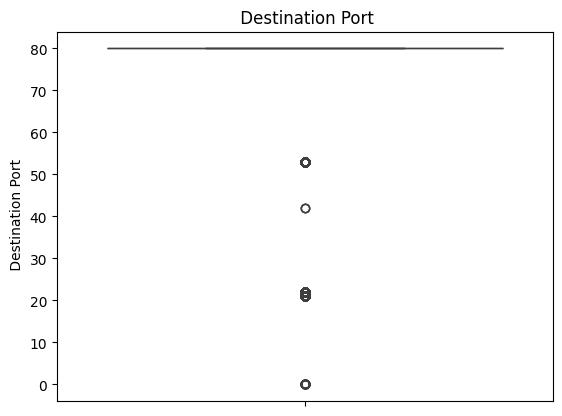

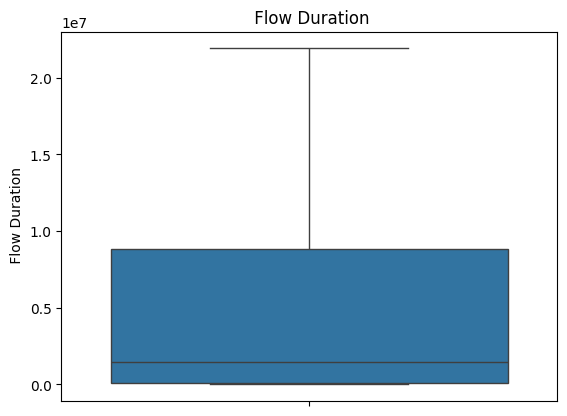

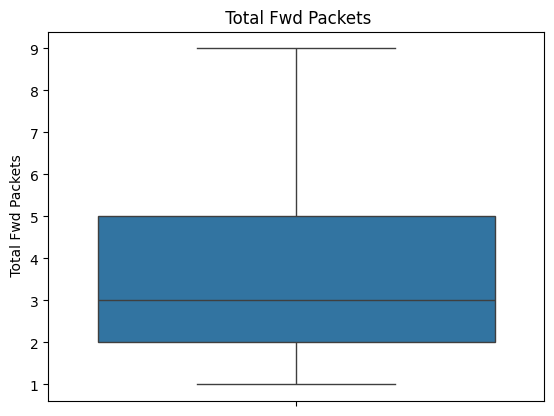

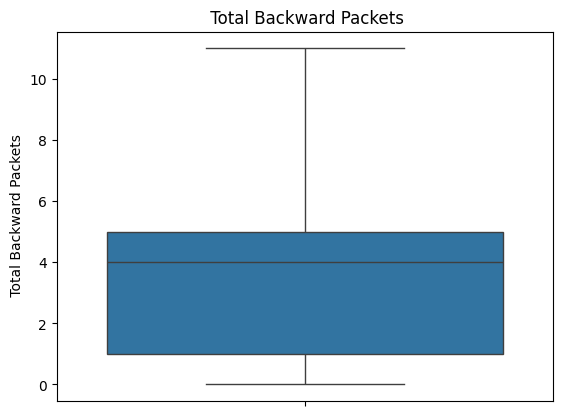

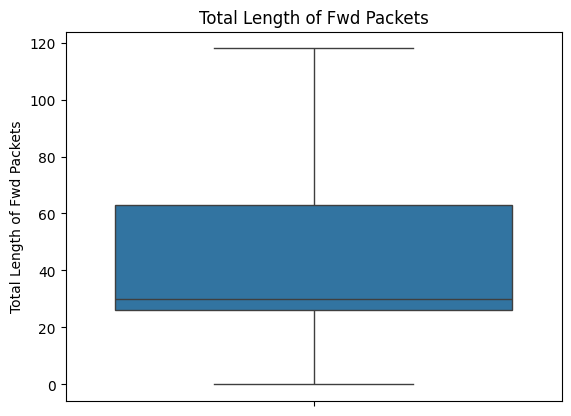

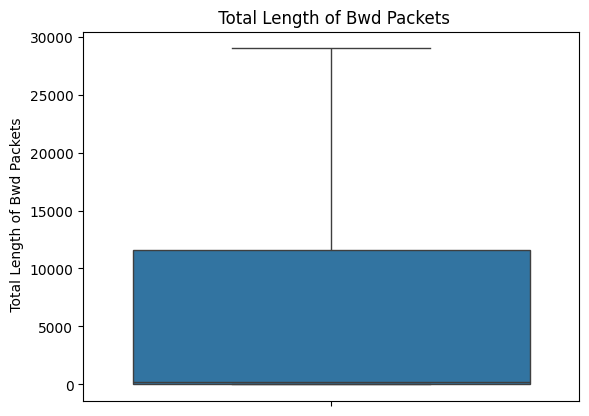

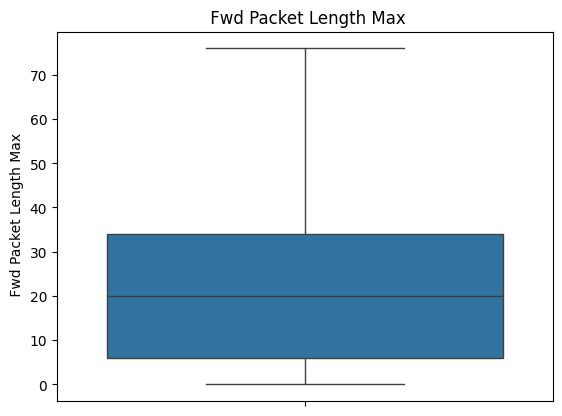

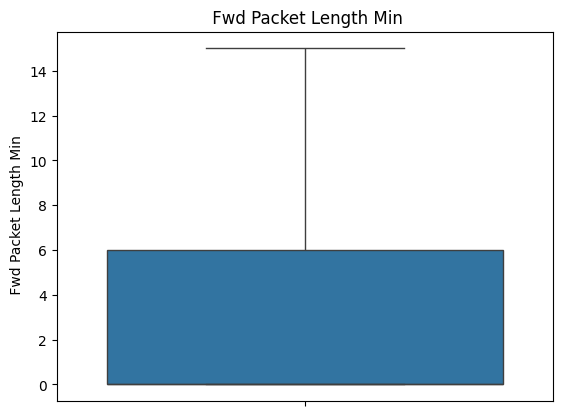

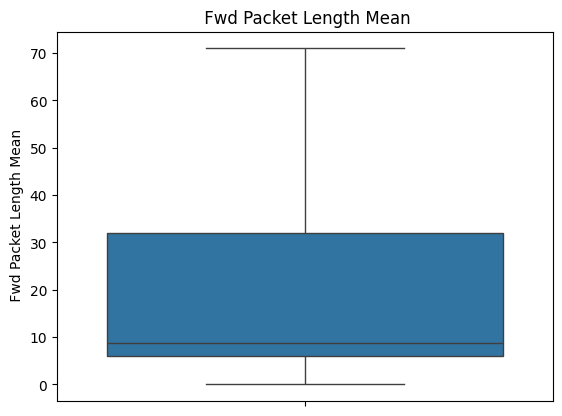

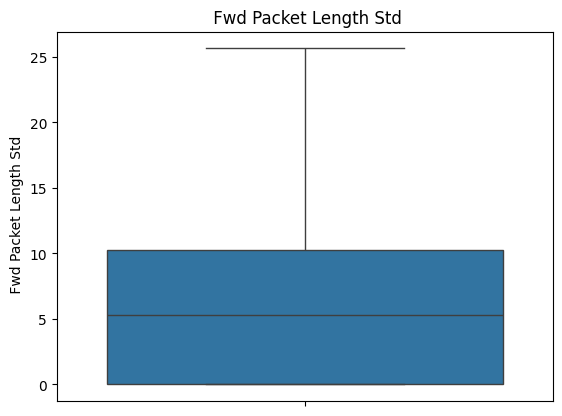

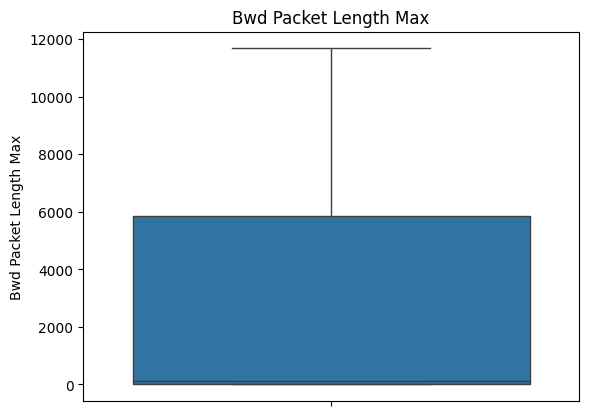

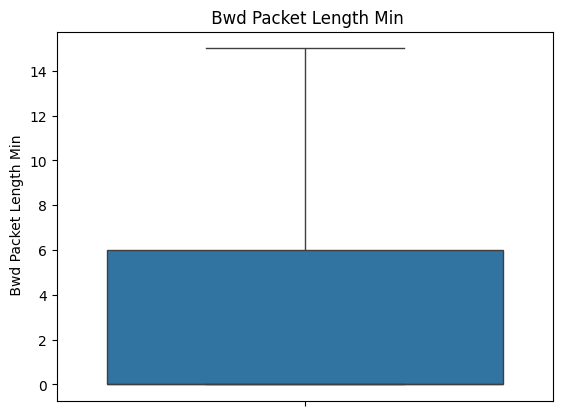

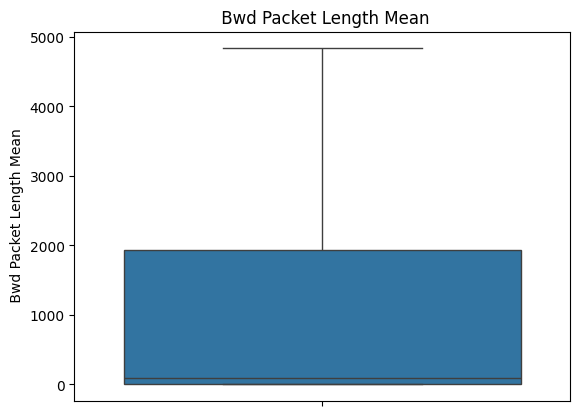

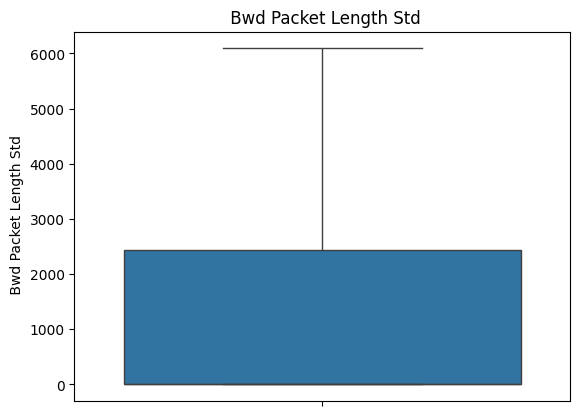

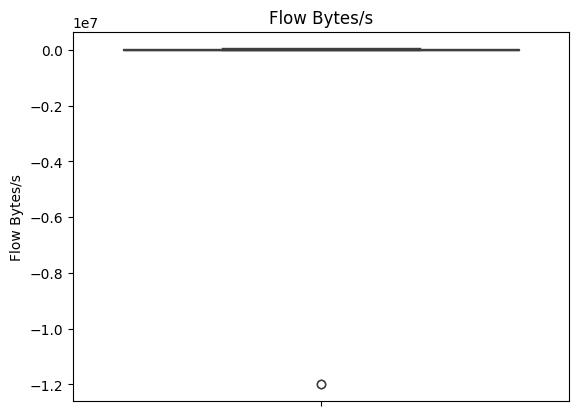

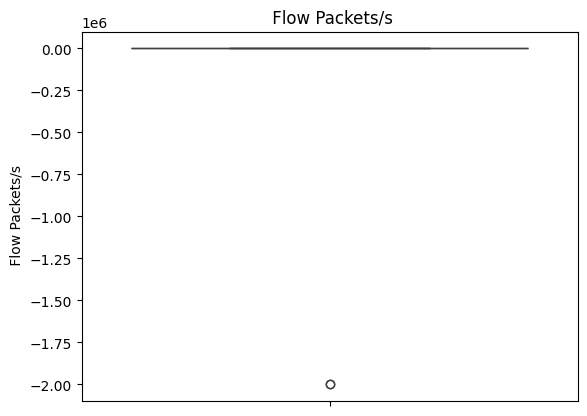

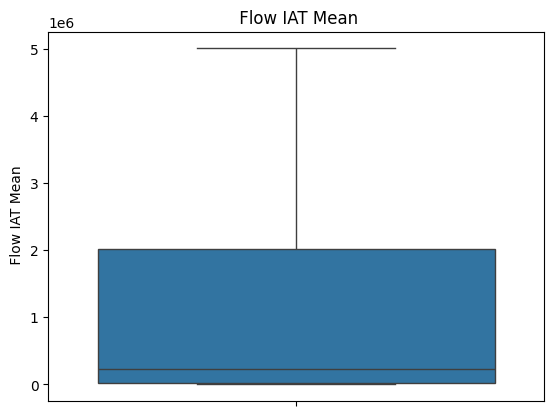

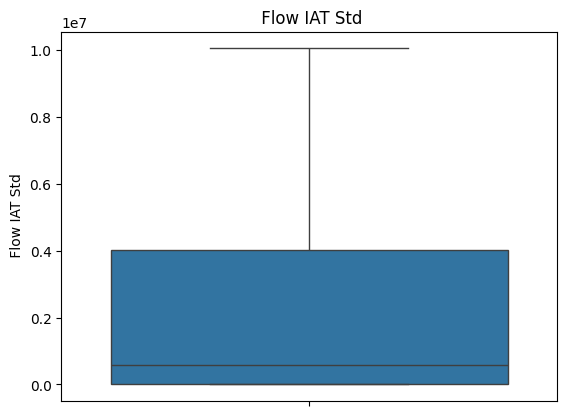

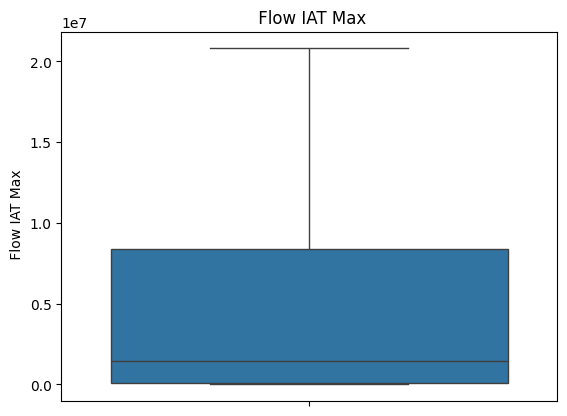

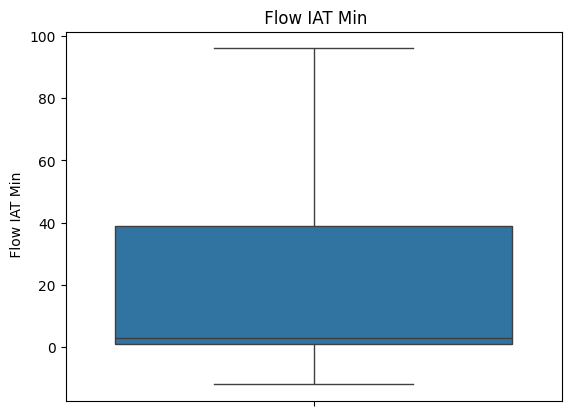

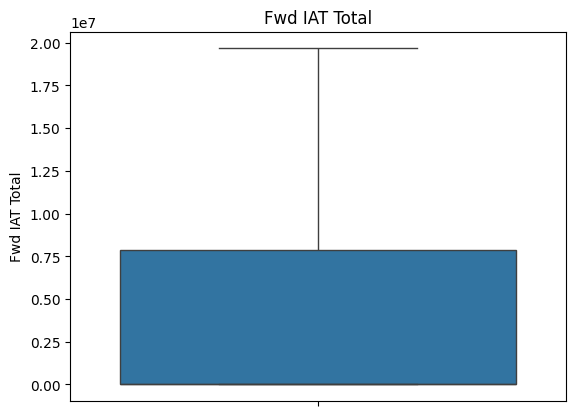

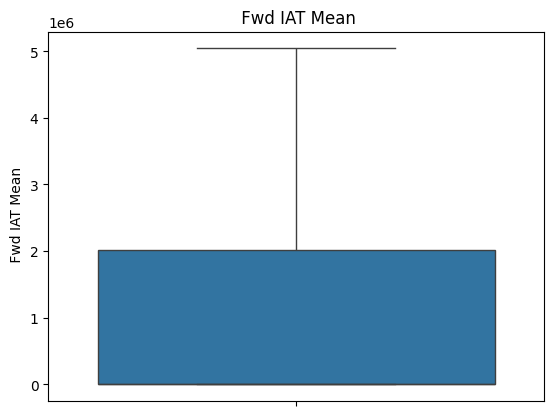

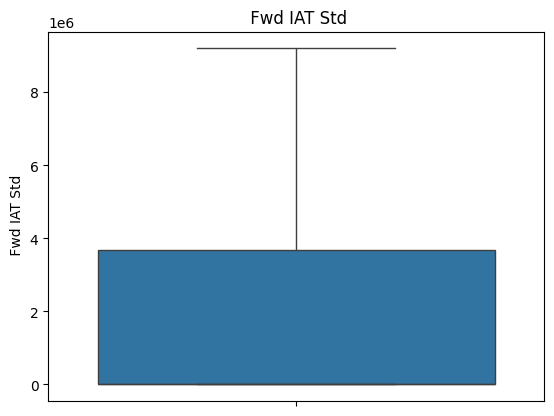

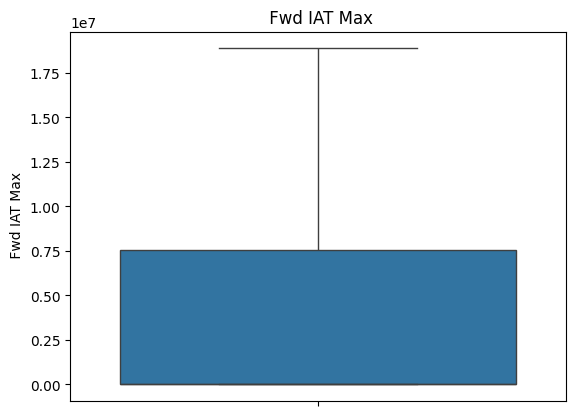

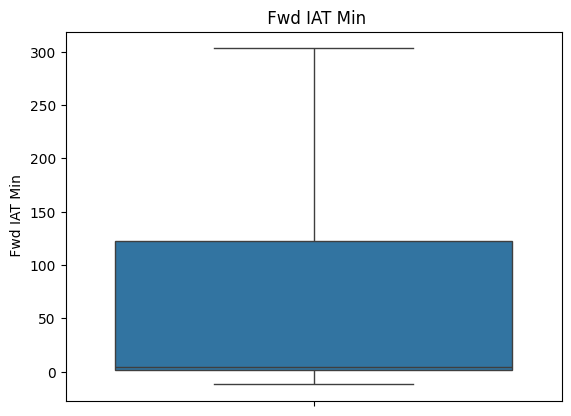

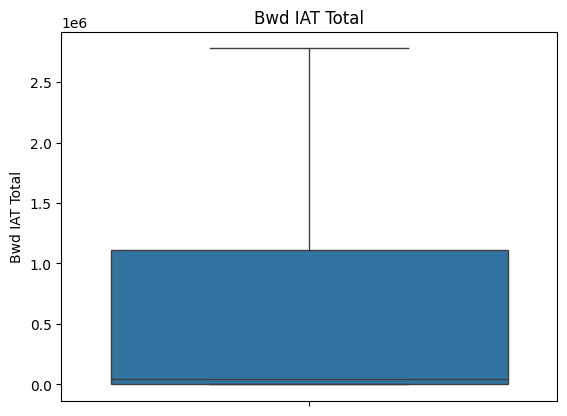

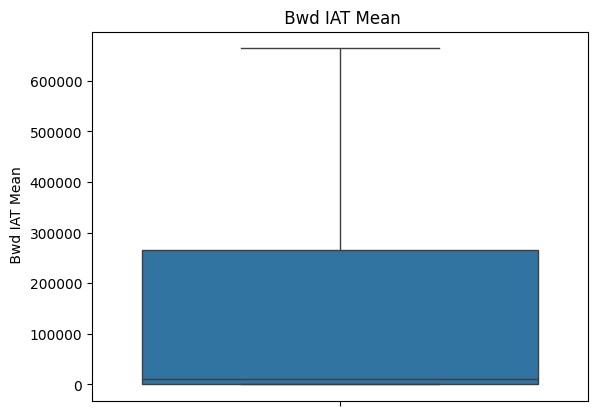

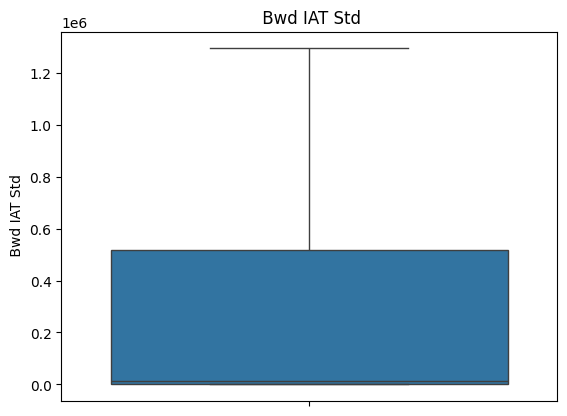

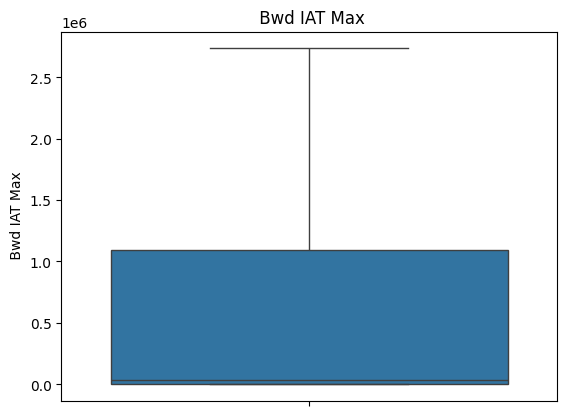

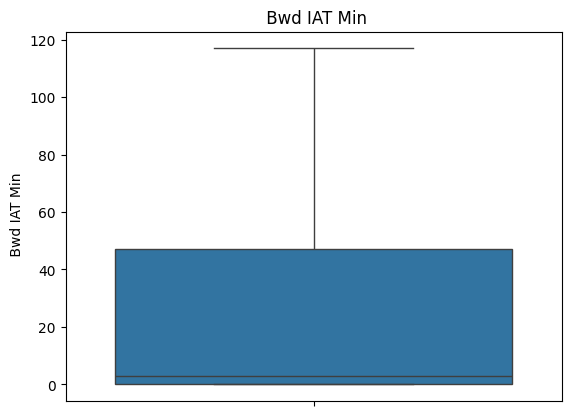

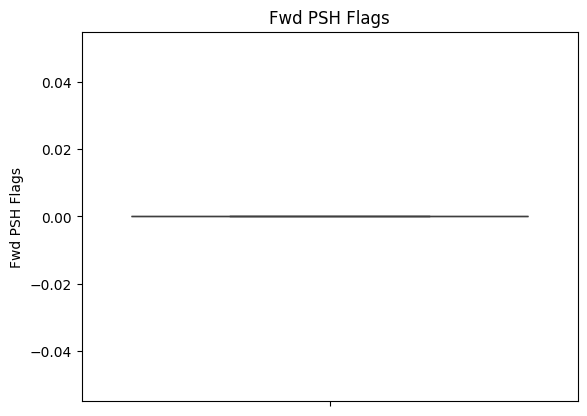

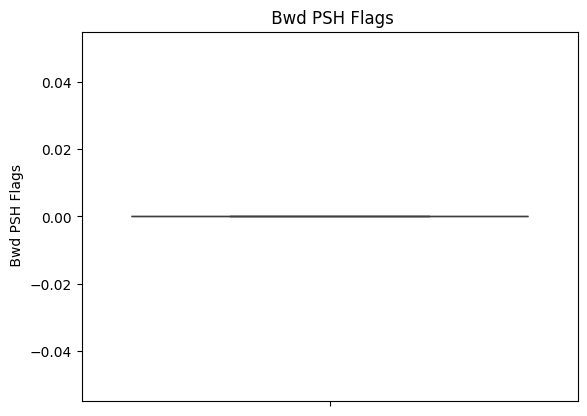

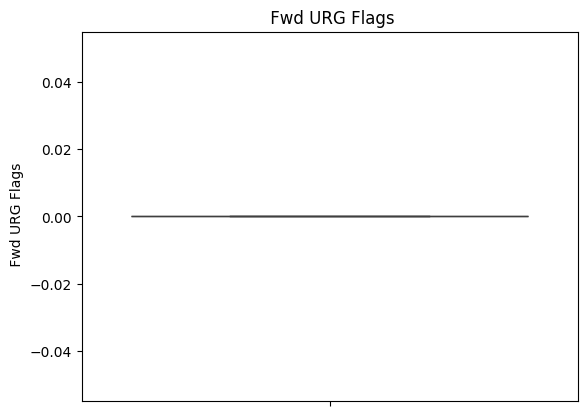

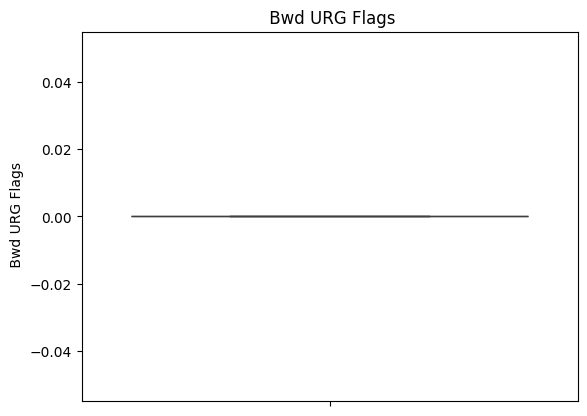

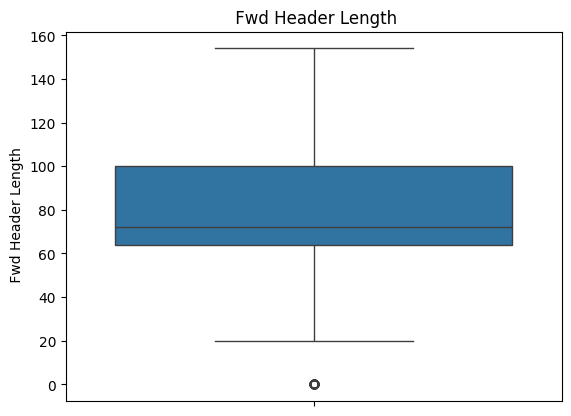

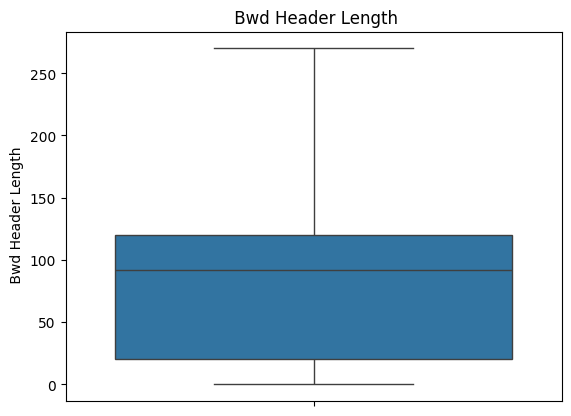

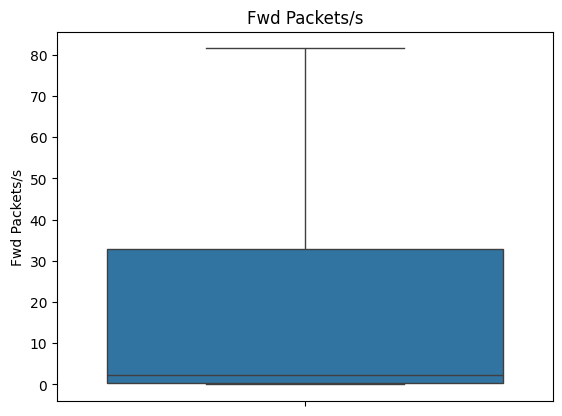

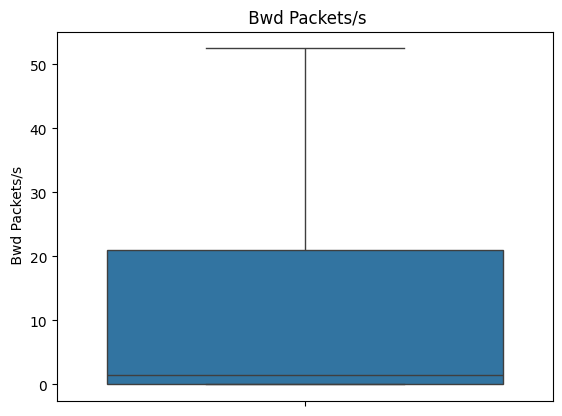

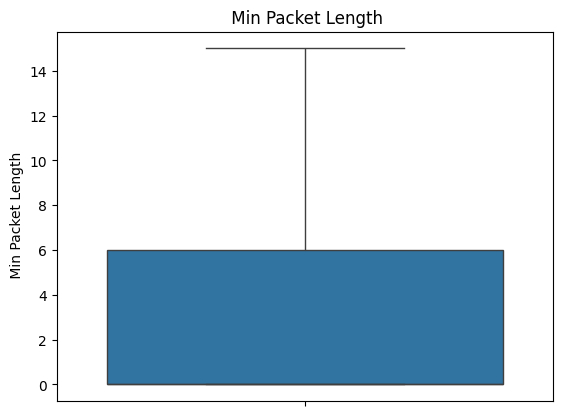

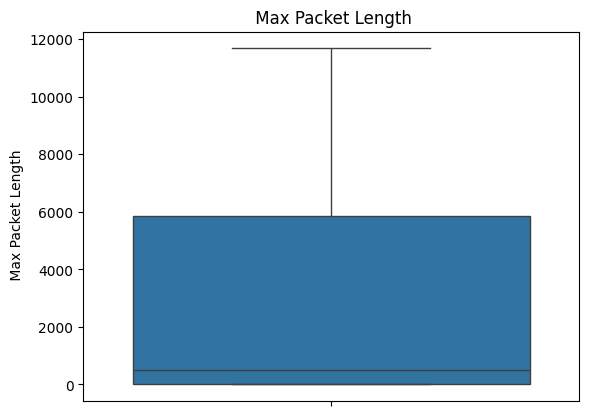

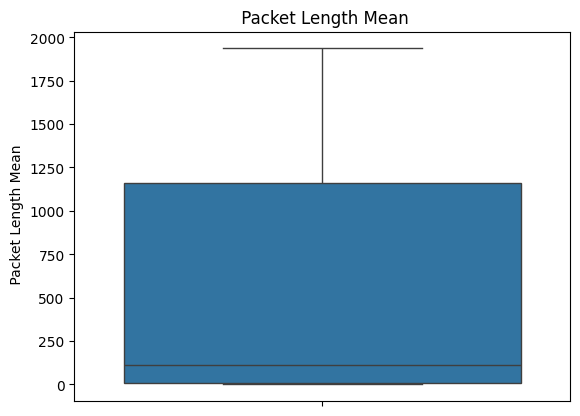

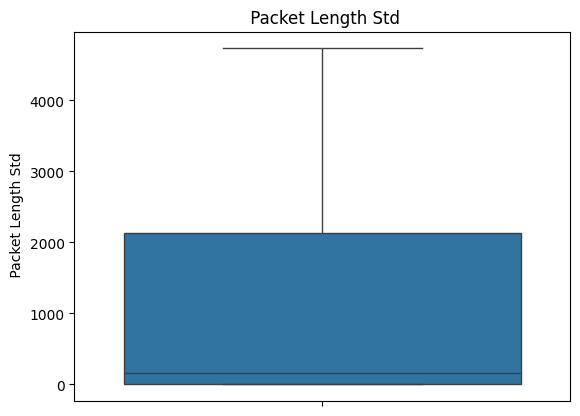

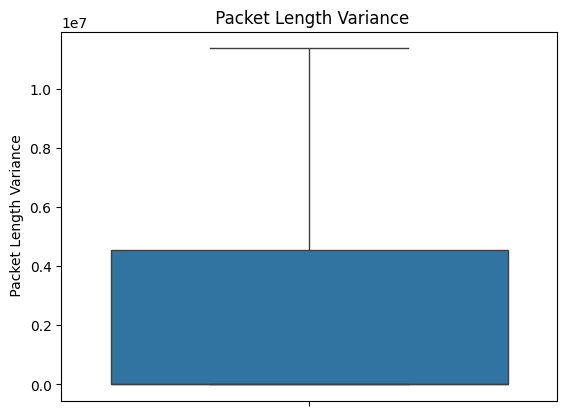

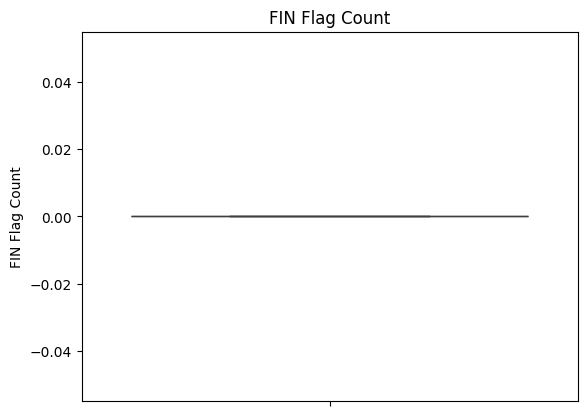

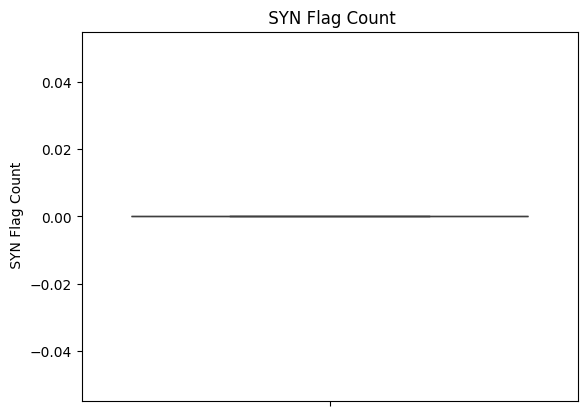

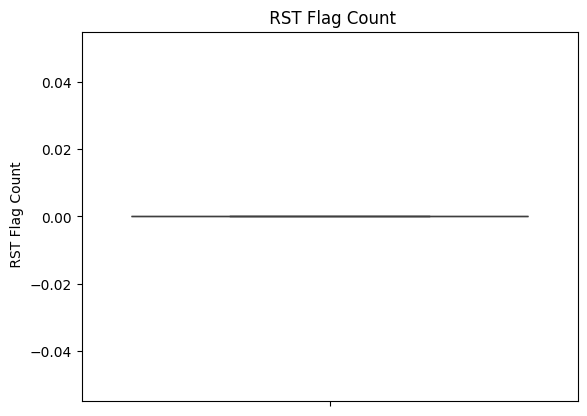

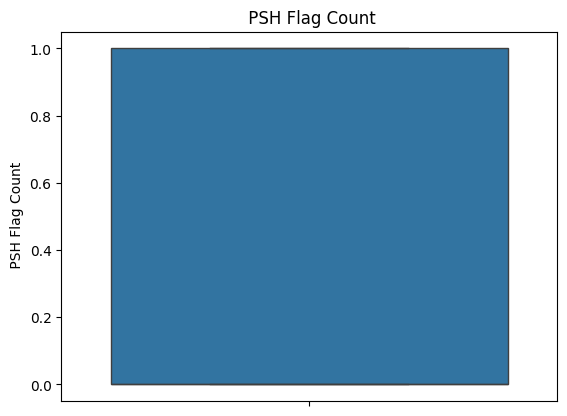

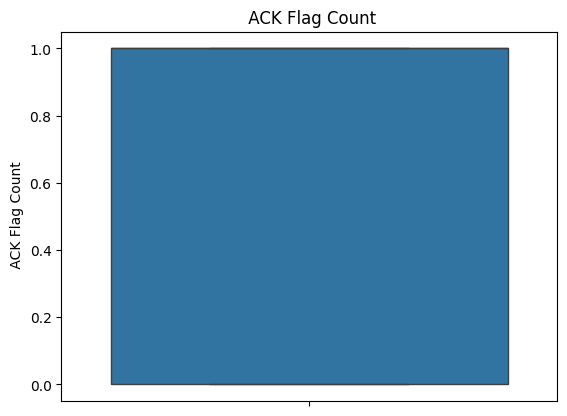

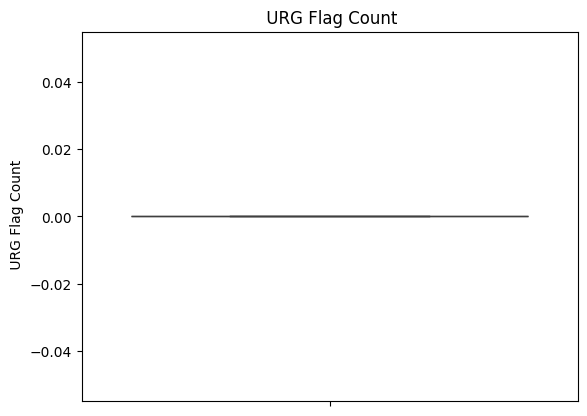

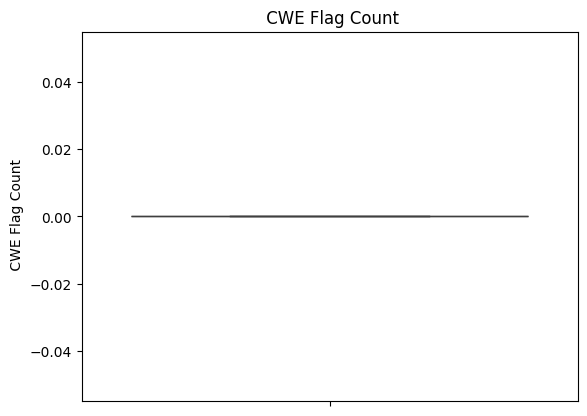

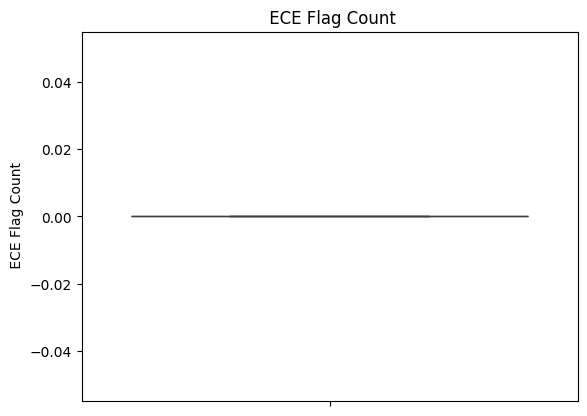

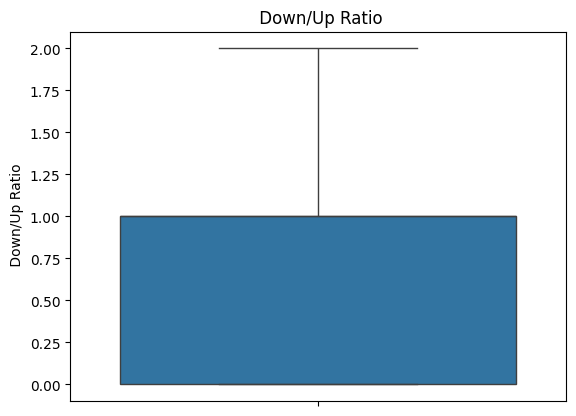

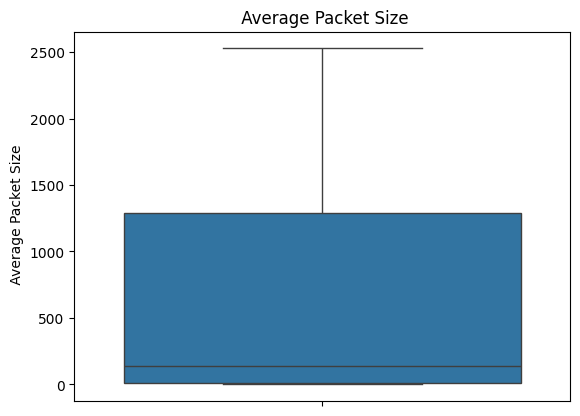

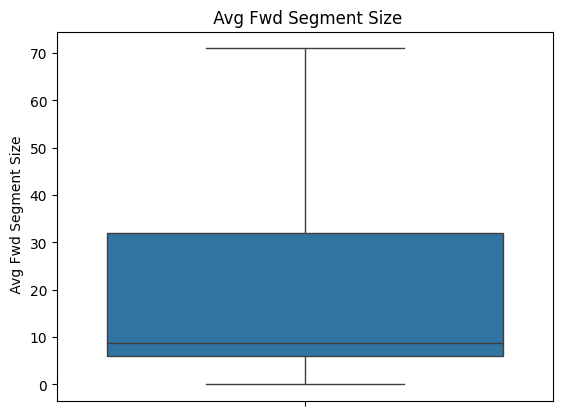

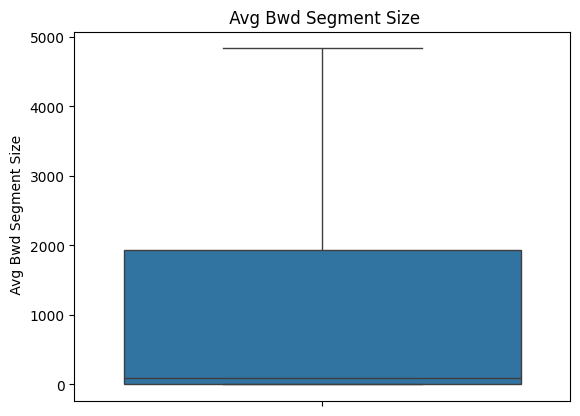

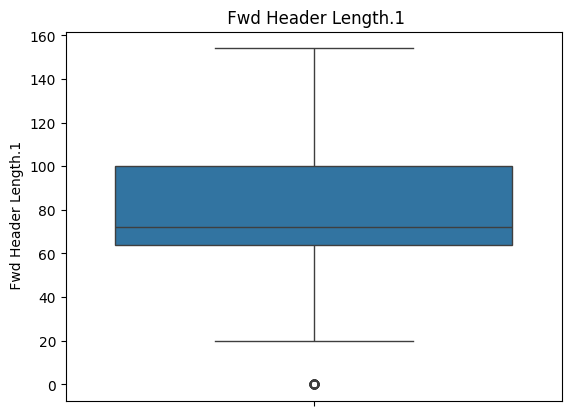

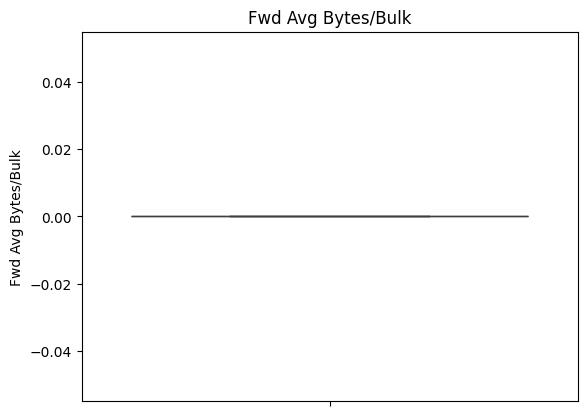

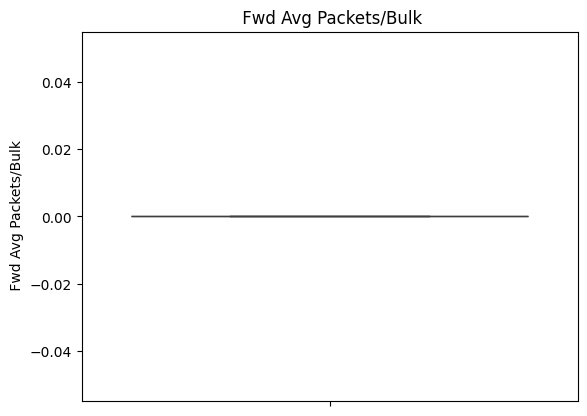

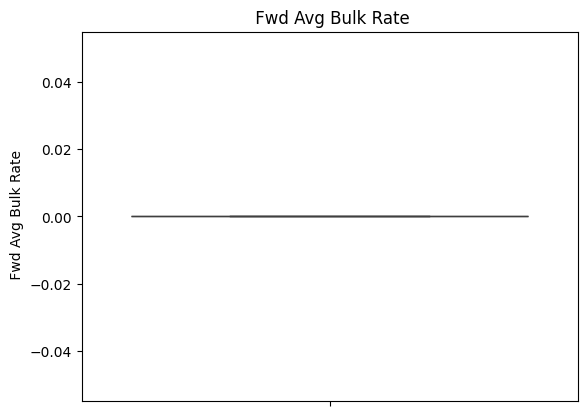

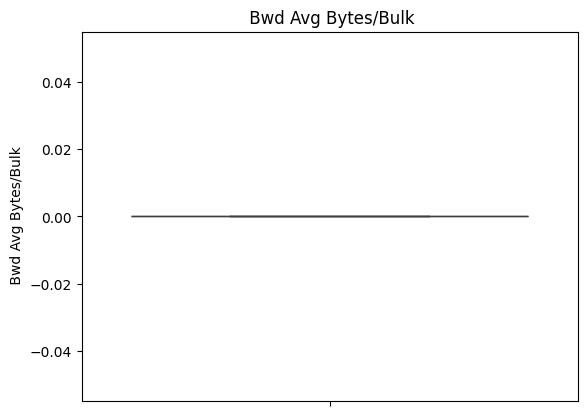

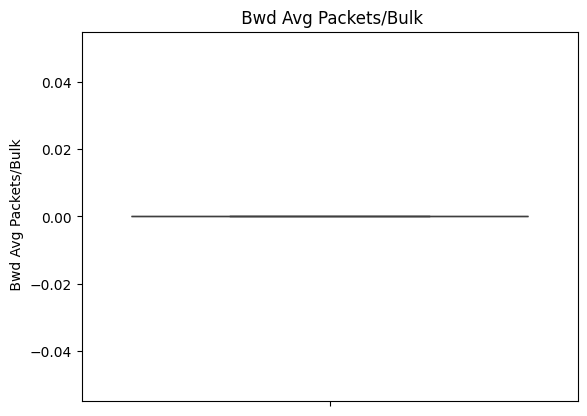

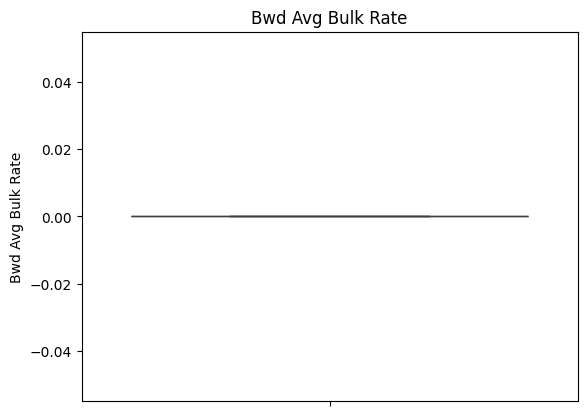

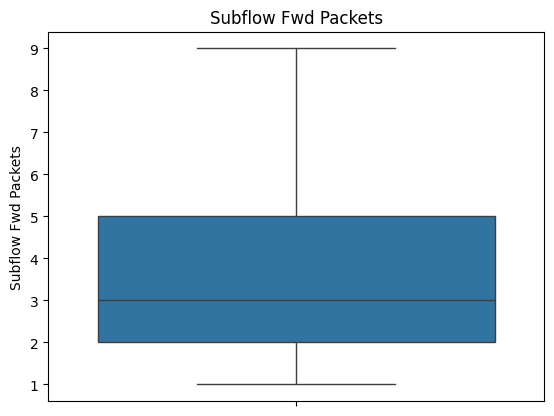

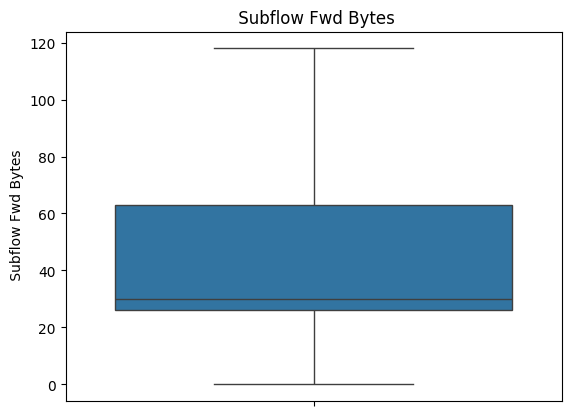

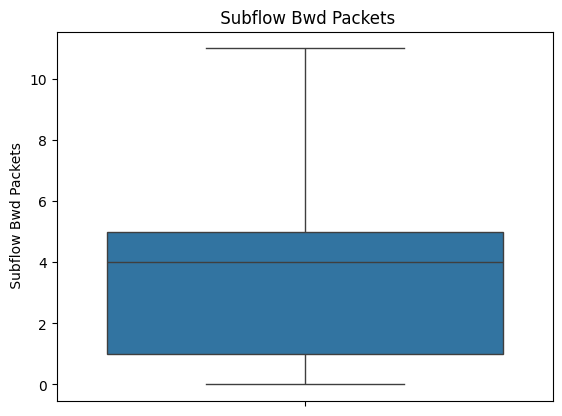

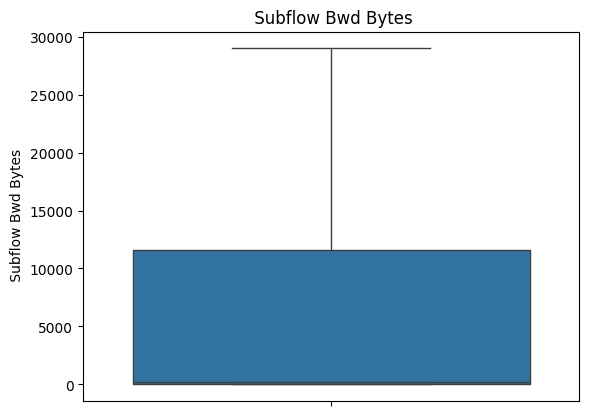

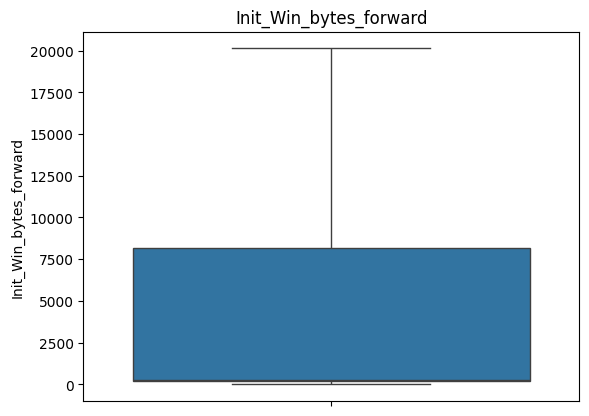

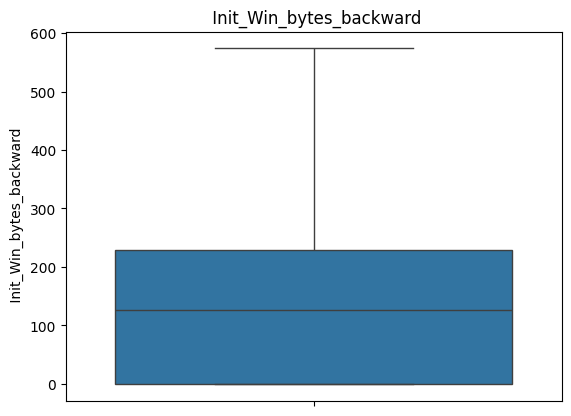

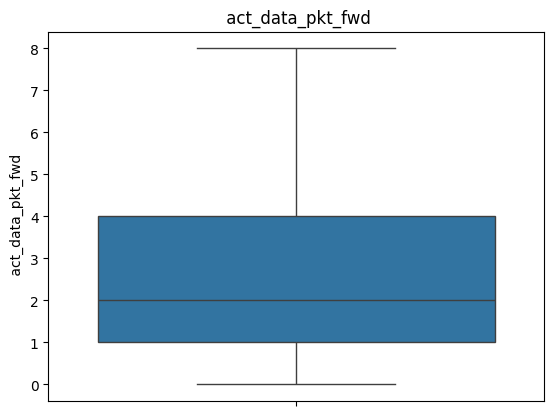

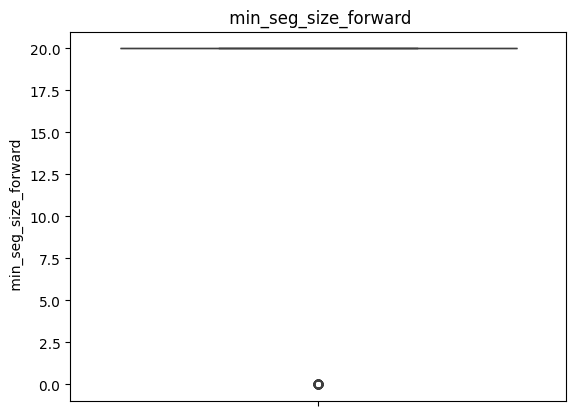

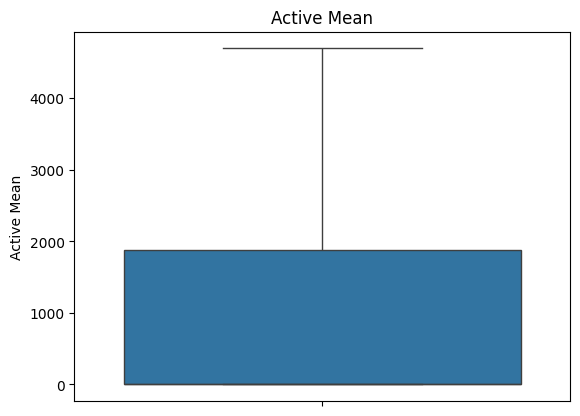

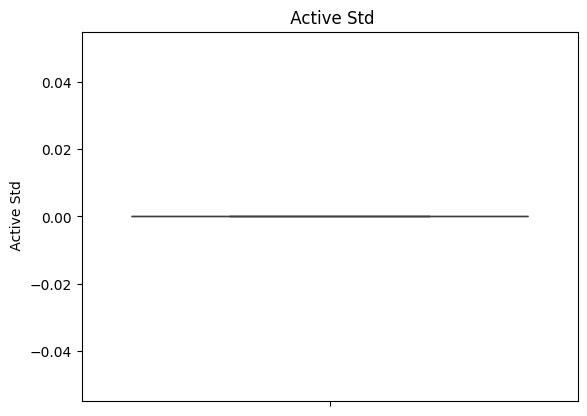

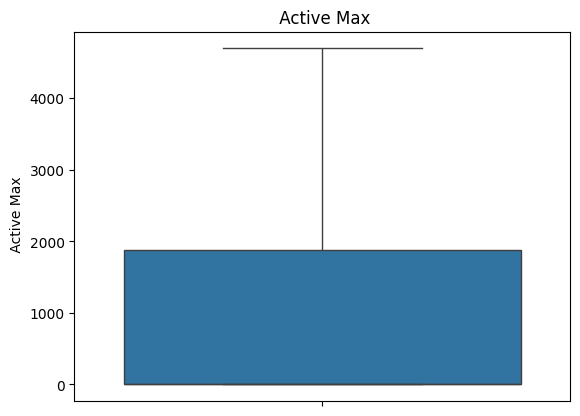

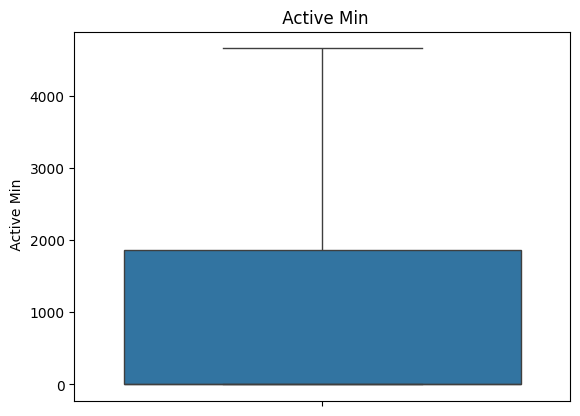

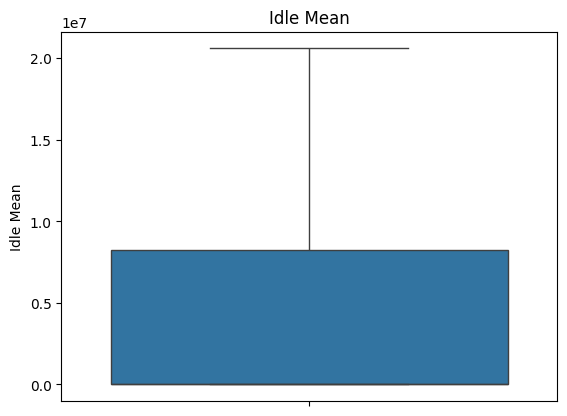

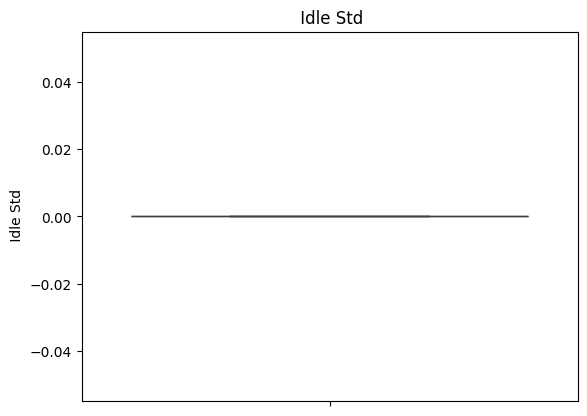

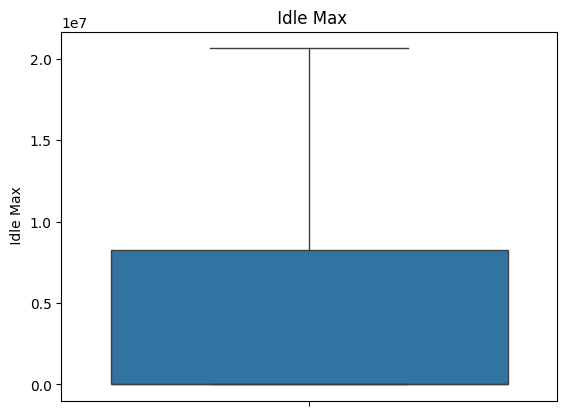

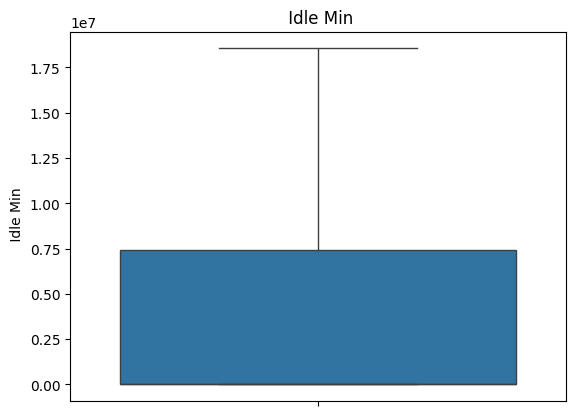

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in num:
  plt.figure()
  sns.boxplot(df[column])
  plt.title(column)
  plt.show()

In [33]:
X = df.drop(' Label', axis=1)
y = df[' Label']

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [36]:
y = to_categorical(y)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model initially
initial_model = create_model()
initial_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Save the initial model
initial_model.save('initial_model.keras')

C:\Users\subha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9614 - loss: 0.0971 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 2/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9987 - loss: 0.0073 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 3/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 4/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9992 - val_loss: 0.0029
Epoch 5/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9989 - loss: 0.0075 - val_accuracy: 0.9994 - val_loss: 0.0025
Epoch 6/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 7/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 8/10
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9991 - loss: 0.0043 - 

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Define class names (replace with actual class names in your dataset)
class_names = ['Class 1', 'Class 2', 'Class 3']  # Replace with your actual class names

# Load the pre-trained model
model = load_model('initial_model.keras')

# Set up callbacks
model_checkpoint = ModelCheckpoint('fine_tuned_model.keras', save_best_only=True)

# Fine-tune the model over 200 epochs without early stopping
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2, callbacks=[model_checkpoint])

# Load the best fine-tuned model
fine_tuned_model = load_model('fine_tuned_model.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = fine_tuned_model.evaluate(X_test, y_test)
y_pred = fine_tuned_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred_classes)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')





Epoch 1/200
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9996 - val_loss: 0.0021
Epoch 2/200
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 0.9996 - val_loss: 0.0020
Epoch 3/200
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9990 - loss: 0.0049 - val_accuracy: 0.9996 - val_loss: 0.0021
Epoch 4/200
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9996 - val_loss: 0.0019
Epoch 5/200
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 6/200
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 7/200
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 8/200
2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9993 - loss: 0

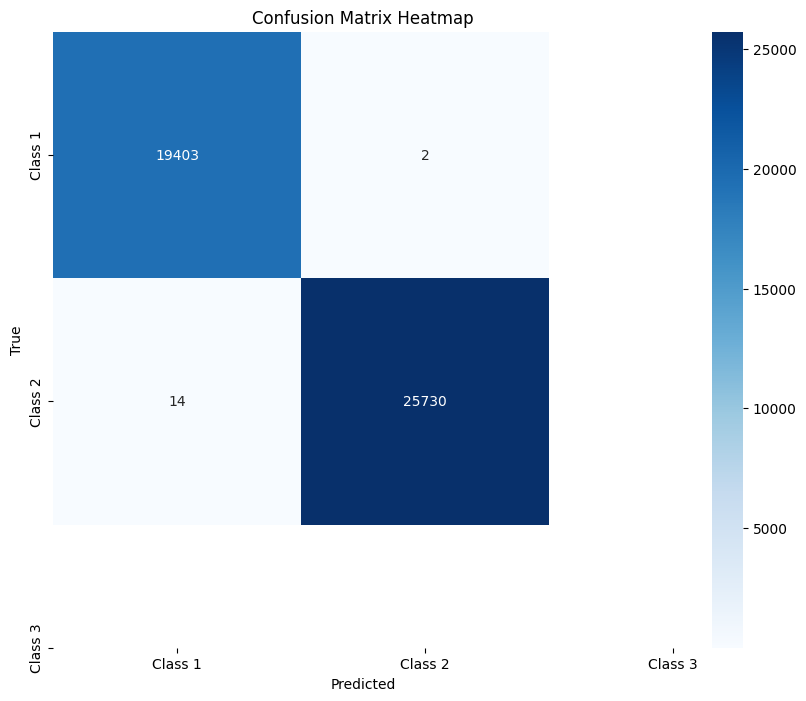

In [40]:
# Plot heatmap of confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

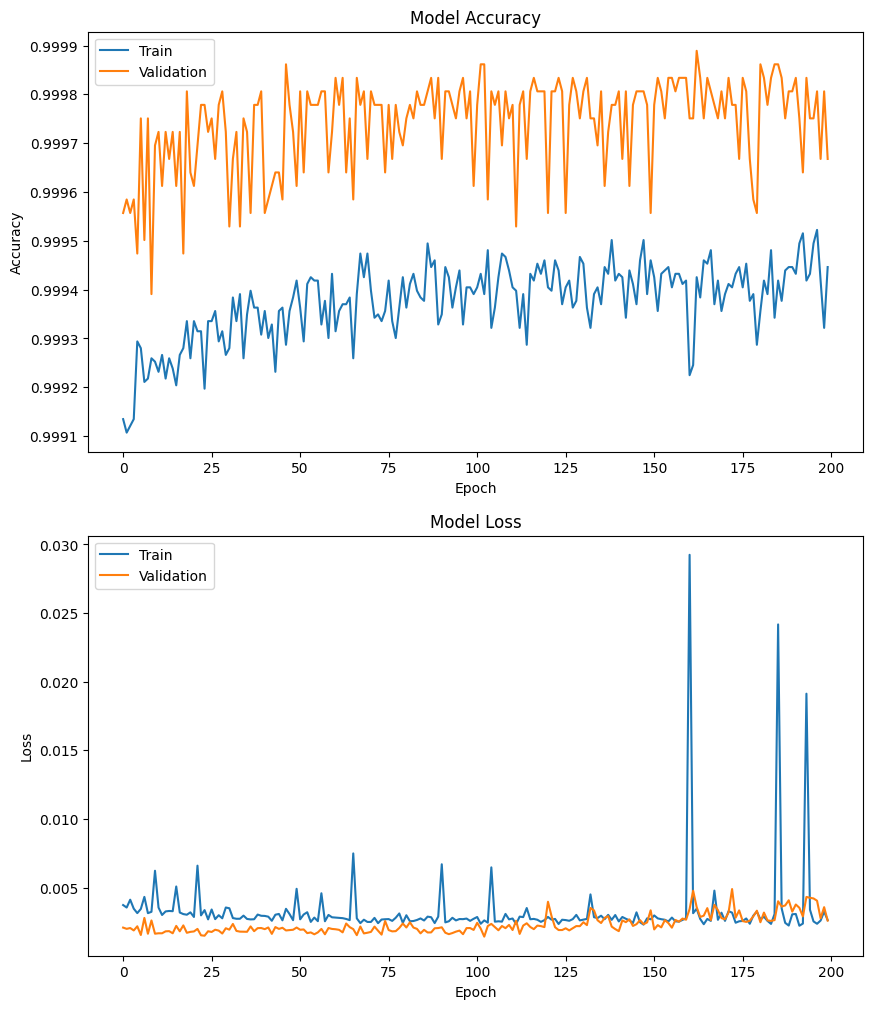

In [41]:
# Plot training & validation accuracy and loss values
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Accuracy plot
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper left')

# Loss plot
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

